In [1]:
import numpy as np
import pandas as pd

In [2]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Baldwin_budget.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                  590       593       579       588       589       591  \
F4  Times1   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times2   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times3   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times4   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times5   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times6   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times7   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times8   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0   
    Times9   300198.0  300198.0  300398.0  300198.0  300198.0  300198.0  

In [3]:
data_pm = pd.read_csv("./best_20com_9pm.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Baldwin_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [4,10]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./Baldwin_percent.csv")

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                  590       593       579       588       589       591  \
F4  Times1   1.313635  1.062534  0.785318  1.143373  1.269034  1.274442   
    Times2   1.275385  1.090638  0.992549  1.124758  1.239334  1.170933   
    Times3   1.579787  1.302046  1.028321  1.143408  1.469783  1.118387   
    Times4   1.210717  1.118796  0.972247  1.499357  1.203807  1.258995   
    Times5   1.149593  1.187501  1.227692  1.484800  1.895503  1.486616   
    Times6   1.469710  1.289076  1.545700  1.495864  1.274450  1.367759   
    Times7   0.990255  1.584812  1.281470  1.524223  0.999103  1.155972   
    Times8   1.340239  1.275602  1.081188  1.103041  1.514228  0.883970   
    Times9   1.347856  1.263090  1.088361  1.112309  1.308028  1.330261  

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F4,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F10,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_7041/514016184.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)


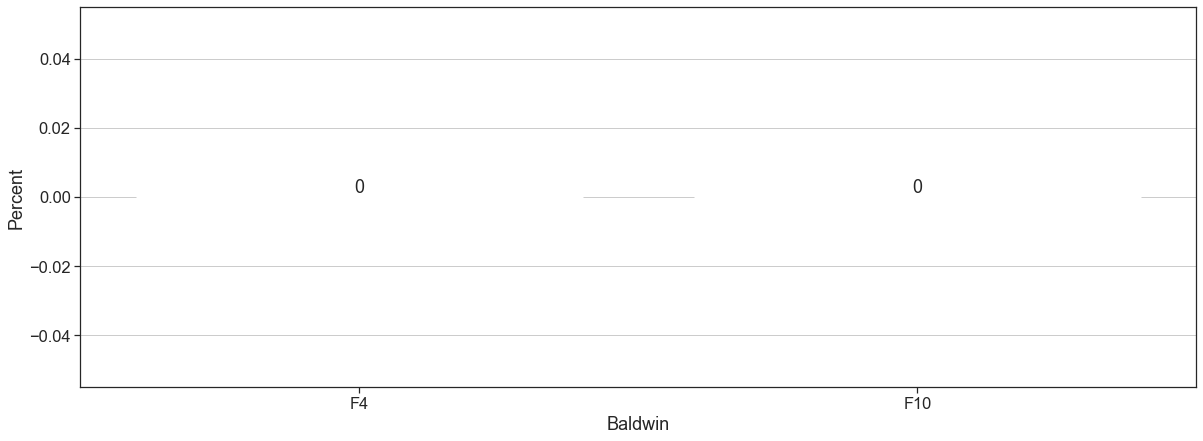

In [4]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",ci=95)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("Baldwin")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    plt.savefig("./Baldwin_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [5]:
# from matplotlib import pyplot as plt
# dataframe = df.copy()
# dataframe = dataframe.stack()
# # display(dataframe)
# dataframe = dataframe.rename_axis(index=["Function","Times","Combinations"])
# dataframe = dataframe.reset_index(level=[0, 1], name="Solutions")
# dataframe["Solutions"] = pd.to_numeric(dataframe["Solutions"])
# dataframe = dataframe.reset_index(drop=False)
# # display(dataframe)
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
# def show_graph(dataframe):
#     sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
#     dist_cols = 3
#     dist_rows = 8
#     plt.figure(figsize=(7 * dist_cols, 4 * dist_rows))
#     i = 1
#     for function in function_list:
#         dataf = dataframe[dataframe["Function"] == function]
#         plt.subplot(dist_rows, dist_cols, i)
#         ax=sns.boxplot(data=dataf, y="Solutions",palette="viridis",x="Function",hue="Function",width=0.2)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1),frameon=False)
#         plt.axhline(y=opt[i-1],color="red")
#         plt.xlabel("")
#         plt.ylabel("Solutions")
#         i = i + 1
#     plt.savefig("./boxplot_Baldwin.png", dpi=1200, bbox_inches='tight')
#     plt.show()
# show_graph(dataframe=dataframe)